# Credit Card Fraud Detection

In this project we will building six different types of classification model
* Decision Tree
* K_Nearest Neighbors (KNN)
* Logistic Regression
* Support Vector Machine (SVM)
* Random Forest
* XGBoost

#### Setp 1.
Import important packages

In [ ]:
# IMPORTING PACKAGES
import pandas as pd  #for data preprocessing
import numpy as np
import matplotlib.pyplot as plt  #for data visualization

from termcolor import colored as cl # text customization
import itertools   #advanced tools

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier   #Decision Tree
from sklearn.neighbors import KNeighborsClassifier  #
from sklearn.svm import SVC   # Spport vectior machine
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score #evaluation metric

#### Setp 2 
Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Setp 3
Import Credit Card Fraud Detection dataset. </br>
The dataset available on Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
#importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/AI_Project/Credit_Card_Fraud_Detection/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# remove the time feature which is of no use to build the models. 
dataset.drop('Time', axis=1, inplace= True)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Data Preprocessing**

Let's have a look at how many fraud cases and non-fraud cases are ther in our dataset

In [ ]:
cases = len(dataset)
nonfraud_count = len(dataset[dataset.Class == 0])  #Count the number of non fraud on the dataset
fraud_count = len(dataset[dataset.Class == 1])   # Count the number of fraud on the dataset

fraud_percentage = round(fraud_count/nonfraud_count * 100, 2)

print(cl('Case Count', attrs=['bold']))
print('--------------------------------------')
print('Total number of cases are: {}'.format(cases))
print('Number of Non-fraud cases are: {}'.format(nonfraud_count))
print('Number of fraud cases are: {}'.format(fraud_count))
print('Percentage of fraud cases is: {}'.format(fraud_percentage))


Case Count
--------------------------------------
Total number of cases are: 284807
Number of Non-fraud cases are: 284315
Number of fraud cases are: 492
Percentage of fraud cases is: 0.17


Statistical view of both fraud and non-fraud transaction amount data using the 'describe' method in Python

In [ ]:
nonfraud_cases = dataset[dataset.Class ==0]
fraud_cases = dataset[dataset.Class == 1]

print(cl('Case Amount Statistics', attrs=['bold']))
print('----------------------------')
print(cl('Non-Fraud Case Amount Stats', attrs=['bold']))
print(nonfraud_cases.Amount.describe())
print('----------------------------')
print(cl('Fraud Case Amount Stats', attrs=['bold']))
print(fraud_cases.Amount.describe())

Case Amount Statistics
----------------------------
Non-Fraud Case Amount Stats
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
----------------------------
Fraud Case Amount Stats
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Standard Scaler

In [ ]:
#Standard Scaler
sc = StandardScaler()
amount = dataset['Amount'].values

dataset['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(dataset['Amount'].head(10))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


Feature Selection and Split the dataset

In [ ]:
#Feature Selection
X = dataset.drop('Class', axis = 1).values
y = dataset['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train Samples :', attrs = ['bold']),X_train[:1])
print(cl('X_test Samples :', attrs = ['bold']), X_test[0:1])
print(cl('Y_train Samples :', attrs = ['bold']), y_train[0:20])
print(cl('Y_test Samples :', attrs = ['bold']), y_test[0:20])


X_train Samples : [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test Samples : [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
Y_train Samples : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y_test Samples : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Model Development
we will building six different types of classification model


*   Decision Tree

*   K_Nearest Neighbors (KNN)
*   Logistic Regression


*   Support Vector Machine (SVM)


*   Random Forest
*   XGBoost





In [23]:
#Model Development
# 1. Decision Tree
tree_model = DecisionTreeClassifier(max_depth= 4, criterion='entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors
n = 5
knn = KNeighborsClassifier(n_neighbors= n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# 4. SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

# 5. Random Forest Tree
rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# 6. XGBoost
xgb = XGBClassifier(max_dept = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [24]:
# 1. Accuracy Score
print(cl('Accuracy Score', attrs = ['bold']))
print(cl('-----------------------------------------------------------', attrs = ['bold']))
print('Accuracy score of the Decision Tree model is: {}'.format(accuracy_score(y_test, tree_yhat)))
print()
print('Accuracy score of the KNN model is: {}'.format(accuracy_score(y_test, knn_yhat)))
print()
print('Accuracy score of the Logistic Regression model is: {}'.format(accuracy_score(y_test, lr_yhat)))
print()
print('Accuracy score of the SVM model is: {}'.format(accuracy_score(y_test, svm_yhat)))
print()
print('Accuracy score of the Random Forest Tree model is: {}'.format(accuracy_score(y_test, rf_yhat)))
print()
print('Accuracy score of the XGBoost model is: {}'.format(accuracy_score(y_test, xgb_yhat)))

Accuracy Score
-----------------------------------------------------------
Accuracy score of the Decision Tree model is: 0.9993679997191109

Accuracy score of the KNN model is: 0.9995259997893332

Accuracy score of the Logistic Regression model is: 0.9991924440855307

Accuracy score of the SVM model is: 0.9993153330290369

Accuracy score of the Random Forest Tree model is: 0.9992802219023208

Accuracy score of the XGBoost model is: 0.9994382219725431


According to the accuracy score evaluation metric, the KNN model reveals to be the most accurate model and the Logistic regression model to be the least accurate model. However, when we round up the results of each model, it shows 0.99 (99% accurate) which is a very good score.

**F1 Score**
The F1 score or F-score is one of the most popular evaluation metrics used for evaluating classification models. It can be simply defined as the harmonic mean of the model’s precision and recall. It is calculated by dividing the product of the model’s precision and recall by the value obtained on adding the model’s precision and recall and finally multiplying the result with 2. It can be expressed as:
**F1 score = 2( (precision * recall) / (precision + recall) )**
The F1 score can be calculated easily in python using the ‘f1_score’ method provided by the scikit-learn package.

In [26]:
# 2. F1 Score
print(cl('F1 Score', attrs=['bold']))
print('-----------------------------')
print('F1 Score of The Decision Tree model is: {}'.format(f1_score(y_test, tree_yhat)))
print()
print('Accuracy score of the KNN model is: {}'.format(f1_score(y_test, knn_yhat)))
print()
print('Accuracy score of the Logistic Regression model is: {}'.format(f1_score(y_test, lr_yhat)))
print()
print('Accuracy score of the SVM model is: {}'.format(f1_score(y_test, svm_yhat)))
print()
print('Accuracy score of the Random Forest Tree model is: {}'.format(f1_score(y_test, rf_yhat)))
print()
print('Accuracy score of the XGBoost model is: {}'.format(f1_score(y_test, xgb_yhat)))

F1 Score
-----------------------------
F1 Score of The Decision Tree model is: 0.8105263157894738

Accuracy score of the KNN model is: 0.8571428571428572

Accuracy score of the Logistic Regression model is: 0.7356321839080459

Accuracy score of the SVM model is: 0.7771428571428572

Accuracy score of the Random Forest Tree model is: 0.7657142857142858

Accuracy score of the XGBoost model is: 0.831578947368421


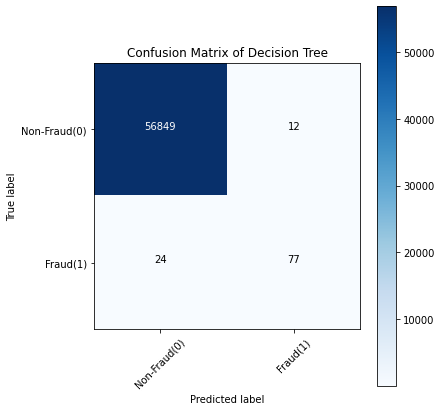

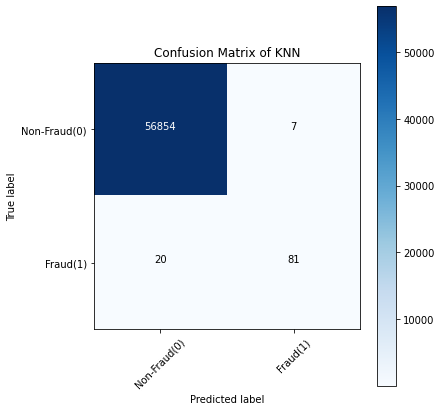

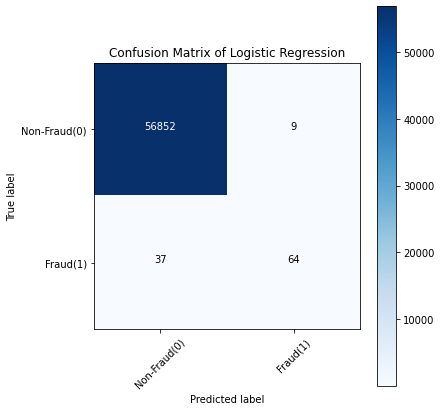

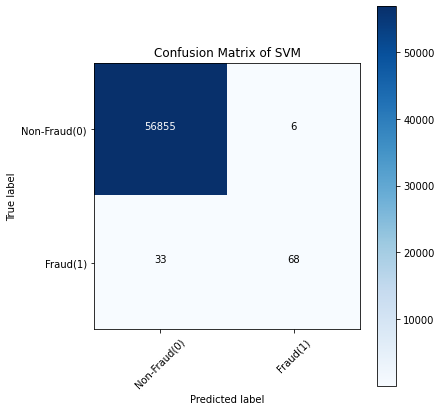

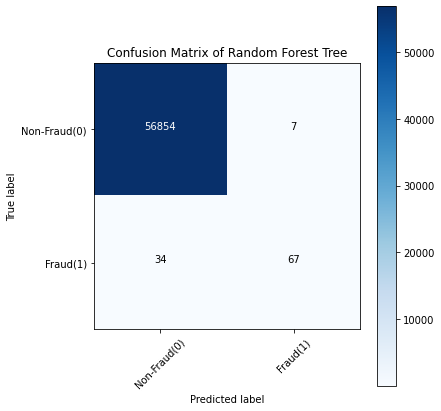

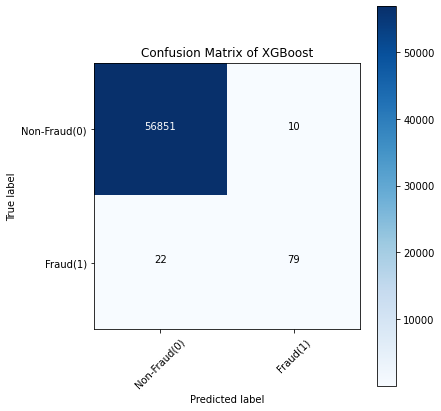

In [28]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()